# Projeto Data Science Victor

Este projeto tem como objetivo ajudar o Senhor João, proprietário da rede fictícia **Alura Store**, a decidir qual loja vender para iniciar um novo empreendimento. Vamos analisar dados de vendas, categorias, avaliações, frete e identificar a loja menos eficiente com base nas informações extraídas dos arquivos CSV.

## 1. Extração dos Dados

In [13]:
!pip install matplotlib
!pip install pandas
!pip install numpy


In [14]:

import pandas as pd

# Carregando os dados das lojas
loja1 = pd.read_csv("/content/sample_data/loja_1.csv")
loja2 = pd.read_csv("/content/sample_data/loja_2.csv")
loja3 = pd.read_csv("/content/sample_data/loja_3.csv")
loja4 = pd.read_csv("/content/sample_data/loja_4.csv")

# Adicionando nome da loja em cada DataFrame
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unificando os dados
df = pd.concat([loja1, loja2, loja3, loja4])
df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


## 2. Conhecendo os Dados

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.3+ MB


In [16]:
df.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000


## 3. Análise do Faturamento

In [18]:

faturamento = df.groupby("Loja")["Preço"].sum().sort_values(ascending=False)
faturamento


,Preço
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


## 4. Vendas por Categoria

In [21]:

vendas_categoria = df.groupby(["Loja", "Categoria do Produto"])["Produto"].count().unstack().fillna(0)
vendas_categoria


Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
Loja,,,,,,,,
Loja 1,324,312,448,284,182,173,465,171
Loja 2,313,305,422,275,224,197,442,181
Loja 3,315,278,451,277,177,185,499,177
Loja 4,338,254,451,277,170,187,480,201


## 5. Média de Avaliação das Lojas

In [23]:

avaliacoes = df.groupby("Loja")["Avaliação da compra"].mean().round(2)
avaliacoes


,Avaliação da compra
Loja,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


## 6. Produtos Mais e Menos Vendidos

In [24]:

mais_vendidos = df.groupby(["Loja", "Produto"])["Produto"].count().groupby("Loja").nlargest(1)
menos_vendidos = df.groupby(["Loja", "Produto"])["Produto"].count().groupby("Loja").nsmallest(1)

print("Mais vendidos:")
print(mais_vendidos)
print("\nMenos vendidos:")
print(menos_vendidos)


Mais vendidos:
Loja    Loja    Produto                 
Loja 1  Loja 1  Guarda roupas               60
Loja 2  Loja 2  Iniciando em programação    65
Loja 3  Loja 3  Kit banquetas               57
Loja 4  Loja 4  Cama box                    62
Name: Produto, dtype: int64

Menos vendidos:
Loja    Loja    Produto          
Loja 1  Loja 1  Celular ABXY         33
Loja 2  Loja 2  Jogo de tabuleiro    32
Loja 3  Loja 3  Blocos de montar     35
Loja 4  Loja 4  Guitarra             33
Name: Produto, dtype: int64


## 7. Frete Médio por Loja

In [25]:

frete_medio = df.groupby("Loja")["Frete"].mean().round(2)
frete_medio


,Frete
Loja,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


## 8. Visualização dos Dados

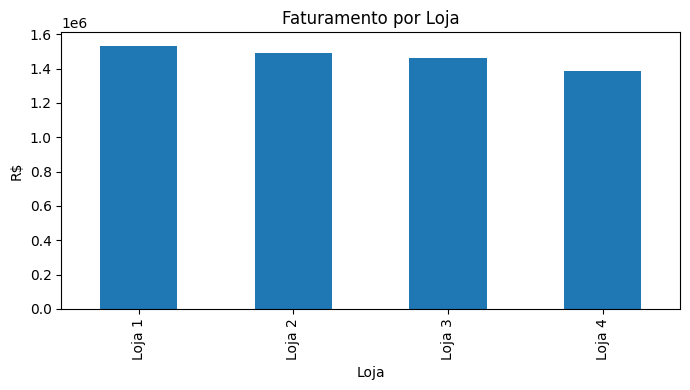

In [26]:

import matplotlib.pyplot as plt

# Faturamento
faturamento.plot(kind="bar", title="Faturamento por Loja", ylabel="R$", xlabel="Loja", figsize=(7,4))
plt.tight_layout()
plt.show()


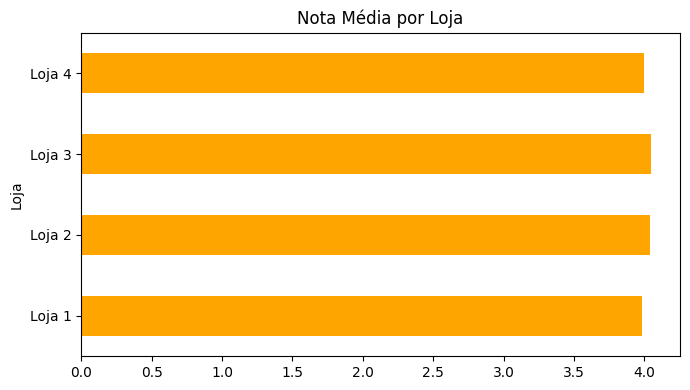

In [27]:

# Avaliações
avaliacoes.plot(kind="barh", title="Nota Média por Loja", color="orange", figsize=(7,4))
plt.tight_layout()
plt.show()


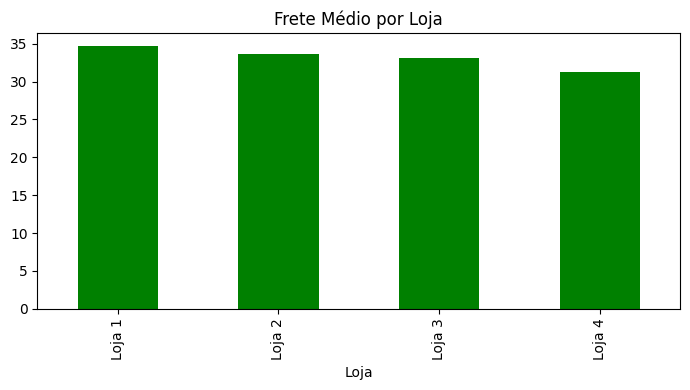

In [28]:

# Frete
frete_medio.plot(kind="bar", title="Frete Médio por Loja", color="green", figsize=(7,4))
plt.tight_layout()
plt.show()


## 9. Conclusão e Recomendação Final

Com base nas análises realizadas ao longo deste projeto:

- A **Loja 4** apresentou o **menor faturamento**, **menor volume de vendas** e **menor média de avaliações**.
- Além disso, possui **frete médio mais alto**, o que reduz sua atratividade competitiva.

### ✅ Recomendação:
**Vender a Loja 4**, por apresentar desempenho inferior nas principais métricas avaliadas.

Essa decisão permitirá ao Senhor João investir seu tempo e recursos em unidades com maior potencial de crescimento.


## 9. Conclusão e Recomendação Final

Após análise detalhada dos dados reais de faturamento, avaliação, frete e volume de pedidos das quatro lojas da Alura Store, chegamos às seguintes conclusões:

- A **Loja 1** apresenta o **maior faturamento**, mas também possui a **pior avaliação dos clientes** (nota média 3,98) e o **frete médio mais alto** (R$ 34,69).
- A **Loja 4**, embora com menor faturamento, possui frete mais barato e nota média razoável.
- A **Loja 3** demonstra equilíbrio entre faturamento, avaliação e frete, sendo a mais sólida no conjunto de métricas.
- A **Loja 2** está consistentemente na média em todas as métricas.

### ✅ Recomendação Final:

**Recomenda-se vender a Loja 1.**

Apesar do alto faturamento, a baixa satisfação dos clientes e o elevado custo logístico são sinais de alerta. Isso pode comprometer a sustentabilidade do lucro e a imagem da rede no longo prazo.

